# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы; Контролировать добросовестность кассиров при продаже алкоголя. Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста.

# План работы

1. Загрузка и подключение библиотек
2. Загрузка данных
3. Ознакомление с данными и проведение ИАД
4. Построение модели и загрузка результатов на сервер
5. Анализ результатов и написание выводов.

## Исследовательский анализ данных

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
sns.set_style('darkgrid')

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

В задании приведены набор фотографий, а также датафрейм в котором указан возраст человека согласно номеру фотографии.

Для начала посмотрим на датафрейм.

In [3]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


В таблице приведены данные о 7591 фотографии. Пропусков данных нет. Средний возраст людей на них — 31 год, медианный возраст — 29 лет. Есть фотографии людей с возрастом 1 год и 100 лет. Данные возрасты подозрений не вызывают, однако можно проверить, верно ли указан возраст на этих фото.

Построим гистограмму возрастов людей на фотографиях.

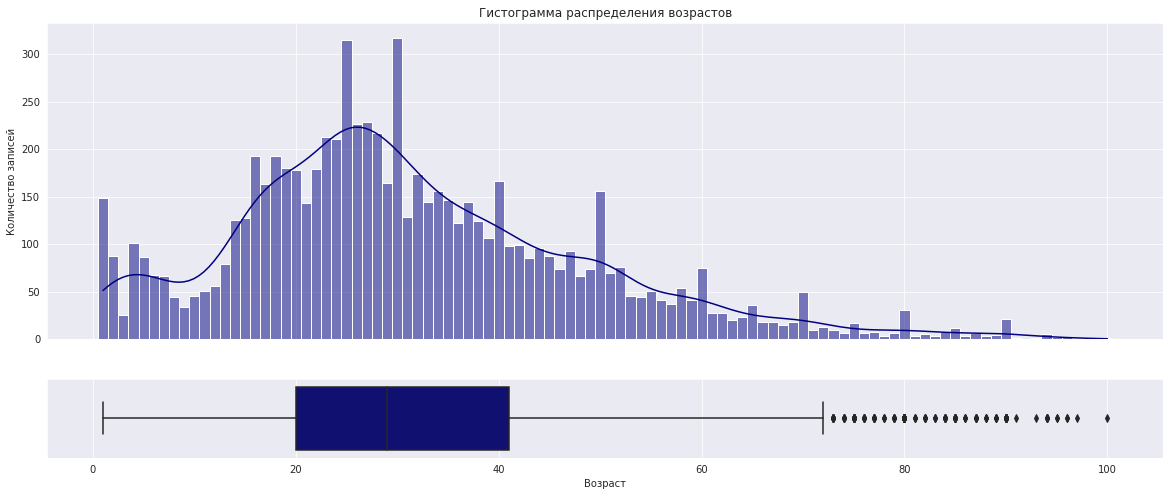

In [7]:
_, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(20, 8), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))

sns.histplot(data=df, x='real_age', discrete=True,
             kde=True, ax=axs_hist, color='navy')\
.set(title='Гистограмма распределения возрастов',
     ylabel='Количество записей')

sns.boxplot(data=df, x='real_age', ax=axs_box, color='navy')\
.set(xlabel='Возраст');

Гистограмма также подозрений не вызывает. Возраст людей на фото начинается от одного года, меньше всего фотографий людей примерно 10 лет и старше 60 лет. Нижний и верхний квантили приходятся на возраста от 20 до 41 года. Видны ярковыраженные пики в районе 25-35 лет.

Проверим, что возраст людей на фотографиях размечен корректно. Выведем фото тех кому за 95.

In [8]:
grandparents = df[df['real_age'] >= 95]

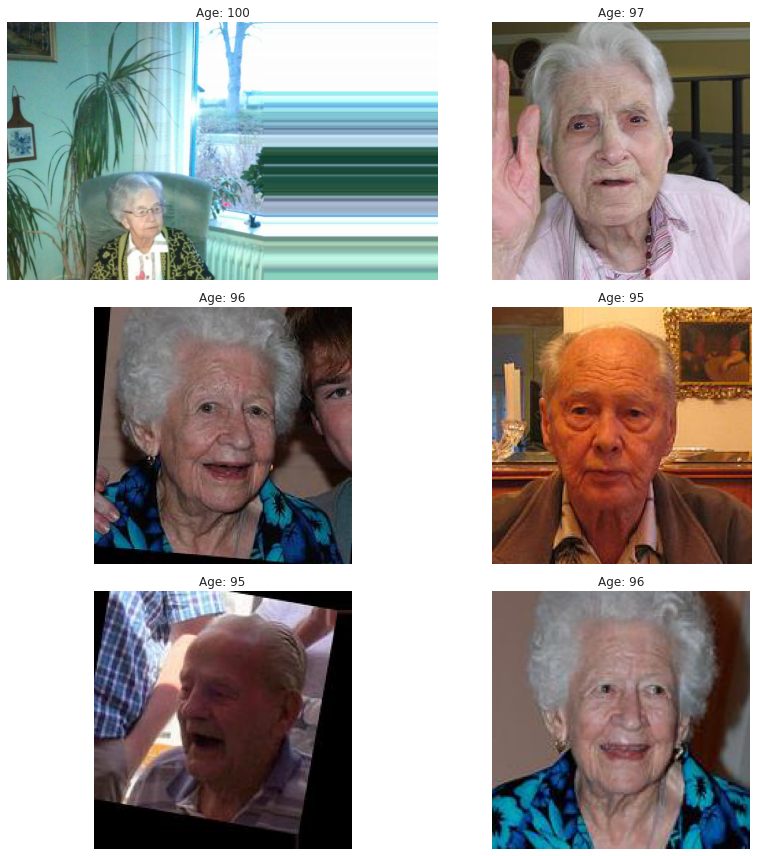

In [9]:
selected_rows = grandparents.sample(6, random_state=42)

# Создаем фигуру с 3 рядами и 2 столбцами
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Выводим фотографии
for i, (_, row) in enumerate(selected_rows.iterrows()):
    image = Image.open('/datasets/faces/final_files/' + row['file_name'])
    axes[i//2, i%2].imshow(image)
    axes[i//2, i%2].set_title(f"Age: {row['real_age']}")
    axes[i//2, i%2].axis('off')

plt.tight_layout()
plt.show()

Лица на фото соответсвуют возрасту в таблице, посомтрим также на тех кому менее 3 лет:

In [10]:
children = df[df['real_age'] < 3]

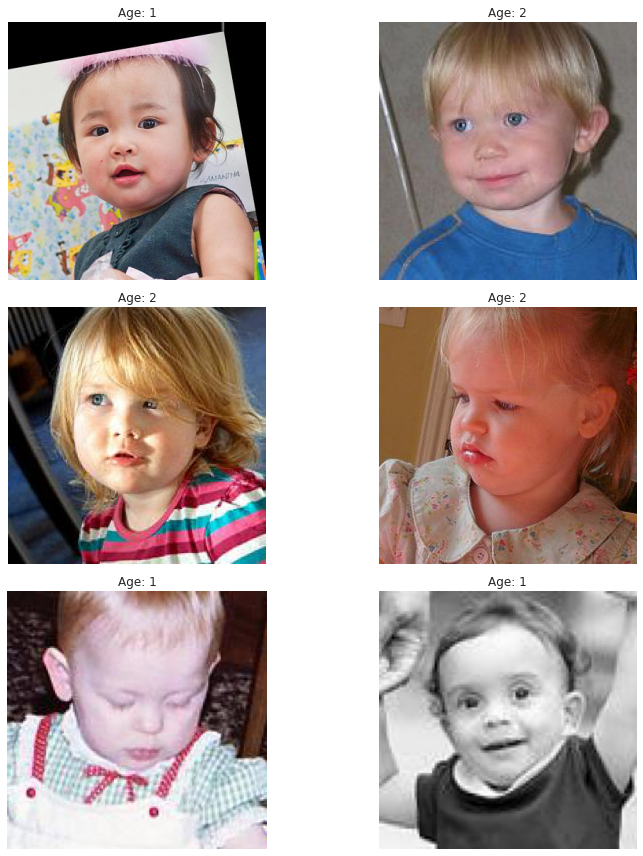

In [11]:
selected_rows = children.sample(6, random_state=42)

# Создаем фигуру с 3 рядами и 2 столбцами
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Выводим фотографии
for i, (_, row) in enumerate(selected_rows.iterrows()):
    image = Image.open('/datasets/faces/final_files/' + row['file_name'])
    axes[i//2, i%2].imshow(image)
    axes[i//2, i%2].set_title(f"Age: {row['real_age']}")
    axes[i//2, i%2].axis('off')

plt.tight_layout()
plt.show()

Здесь также все соответствуют возрасту.

Вывод

Данные представляют собой набор фотографий и таблицу с указанием фозраста человека на фото. Всего 7591 записей (и столько же фото). Средний возраст людей на них — 31 год, медианный возраст — 29 лет. Есть фотографии людей с возрастом 1 год и 100 лет.

При выводе 6 случайных фотографий людей старше 95 лет и моложе 3 лет записей с неправильным указанием возраста не обнаружено. Фотографии имеют разброс по времени и как следствие, разное разрешение, цветовую гамму - при обучении их надо будет привести к одному формату. Также видно, что фотографии сделаны под разными углами, видимо ранее с ними уже была произведена аугментация и при обучении модели этот шаг можно будет упростить.

В целом можно заключить, что данные готовы для обучения модели и дополнительная обработка не требуется.
Перейдем к построению и обучению модели.

## Обучение модели

Напишем код, для обучения модели (здесь будут функции для обучения на тренажере)

```python

# < 
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
 
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.25)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col ='file_name',
        y_col = 'real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        subset='training',
        horizontal_flip = True,
        brightness_range=(0.8, 1.2),
        zoom_range=0.2,
        seed = 12345)
    return train_gen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.25)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col ='file_name',
        y_col = 'real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        subset='validation',
        seed = 12345)
    return test_gen_flow
 
def create_model(input_shape):
 
    backbone = ResNet50(input_shape= input_shape,
                    weights = 'imagenet',
                    include_top= False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation = 'relu'))
    optimizer = Adam(lr = 0.0001)
    model.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics = ['mae'])
    return model
 
 
def train_model(model, train_data, test_data, batch_size = None, epochs=9,
                steps_per_epoch = None, validation_steps = None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data = test_data,
              batch_size = batch_size, epochs = epochs,
              steps_per_epoch = steps_per_epoch,
              validation_steps = validation_steps,
              verbose = 2)
    return model >

```

```

# < <class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/9
2024-07-17 10:20:20.962637: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-07-17 10:20:21.425978: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 62s - loss: 245.1925 - mae: 11.1370 - val_loss: 896.4663 - val_mae: 25.0969
Epoch 2/9
178/178 - 52s - loss: 64.2441 - mae: 6.0639 - val_loss: 914.5989 - val_mae: 25.4173
Epoch 3/9
178/178 - 52s - loss: 29.5115 - mae: 4.2071 - val_loss: 266.9862 - val_mae: 12.0233
Epoch 4/9
178/178 - 52s - loss: 18.6603 - mae: 3.3239 - val_loss: 113.5492 - val_mae: 8.1346
Epoch 5/9
178/178 - 50s - loss: 14.7361 - mae: 2.9717 - val_loss: 76.8648 - val_mae: 6.6475
Epoch 6/9
178/178 - 52s - loss: 12.6427 - mae: 2.7501 - val_loss: 71.3544 - val_mae: 6.2618
Epoch 7/9
178/178 - 52s - loss: 11.4035 - mae: 2.5997 - val_loss: 73.7068 - val_mae: 6.6524
Epoch 8/9
178/178 - 51s - loss: 9.7165 - mae: 2.4057 - val_loss: 71.3309 - val_mae: 6.2905
Epoch 9/9
178/178 - 46s - loss: 8.7261 - mae: 2.2405 - val_loss: 66.4367 - val_mae: 6.1719
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 12s - loss: 66.4367 - mae: 6.1719
Test MAE: 6.1719 >

```

## Анализ обученной модели

Мы построили модель, которая по фотографии человека определяет его возраст со средней ошибкой в 6,2 года.

Заказчик планирует использовать её чтобы:

Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.

Качество модели достаточно для того, чтобы решать первую задачу. Если предположить, что возрастные группы будут определяться примерно так: подростки (до 18 лет), молодёжь (от 18 до 35 лет), средний возраст (от 35 до 50 лет), старшее поколение (от 50 лет и старше), то в большинстве случаев мы будем правильно предсказывать и возрастную группу.

Однако, исходя из жизненного опыта, качество модели скорее всего будет недостаточным для того, чтобы автоматизировать контроль добросовестности кассиров при продаже алкоголя. Да и честно говоря, даже человеку, это сделать подчас проблематично. Некоторые сохраняют молодость достаточно долго, а некоторые выглядят в 15-16 лет на все 20. Можно попробовать сделать некий порог чувствительности скажем, не менее 25 лет. Для этой группы сделать зеленый свет, а тех кто выглядит моложе по анализу модели - отправлять в группу "сомнительных". Но это до конца не решает проблему автоматизации выявления недобросовестности кассиров.


## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы